# LINEAR REGRESSION
What is LR?
Assumption:Linearity, Homoscedicity, Normality, Independence
Advantages:Simple, EasyModelling, Computaion complexity easy
Disadvantages:ComplexData(NonLinear),Outlier Sensitive, High Bias 
Scaling required?- Normalization-MinMax(0 to 1), StdScaler(u=0, s=1)
Outlier Impact?: Boxplot, z-score
Simple Linear vs Multilinear.
Correlation coefficient(r)
Multicollinearity: VIF
Math Intution.
Cost Function: MSE.
OLS(Ordinary Least Square)
Gradient Descent - 3 - Batch, Stochastic, MiniBatch
Overfitting- Bias, Variance
Regularization: 3 - Ridge, Lasso, ElasticNet
Evaluation: 5 - R2, Adj R2, MSE, RMSE, MAE, TSS, RSS
Polynomial

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
df= pd.read_csv('C:\\Users\\Pramod\\Desktop\\ml\\ADMI_PRED.csv') 

In [9]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [128]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [130]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [131]:
print(df.shape)
df1.describe()

(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [133]:
df1=df.drop(columns=['Serial No.'])

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [138]:
df1.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [139]:
df1.corr(method="pearson")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

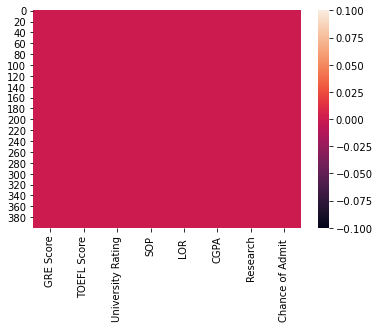

In [140]:
sns.heatmap(df1.isnull())

In [141]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


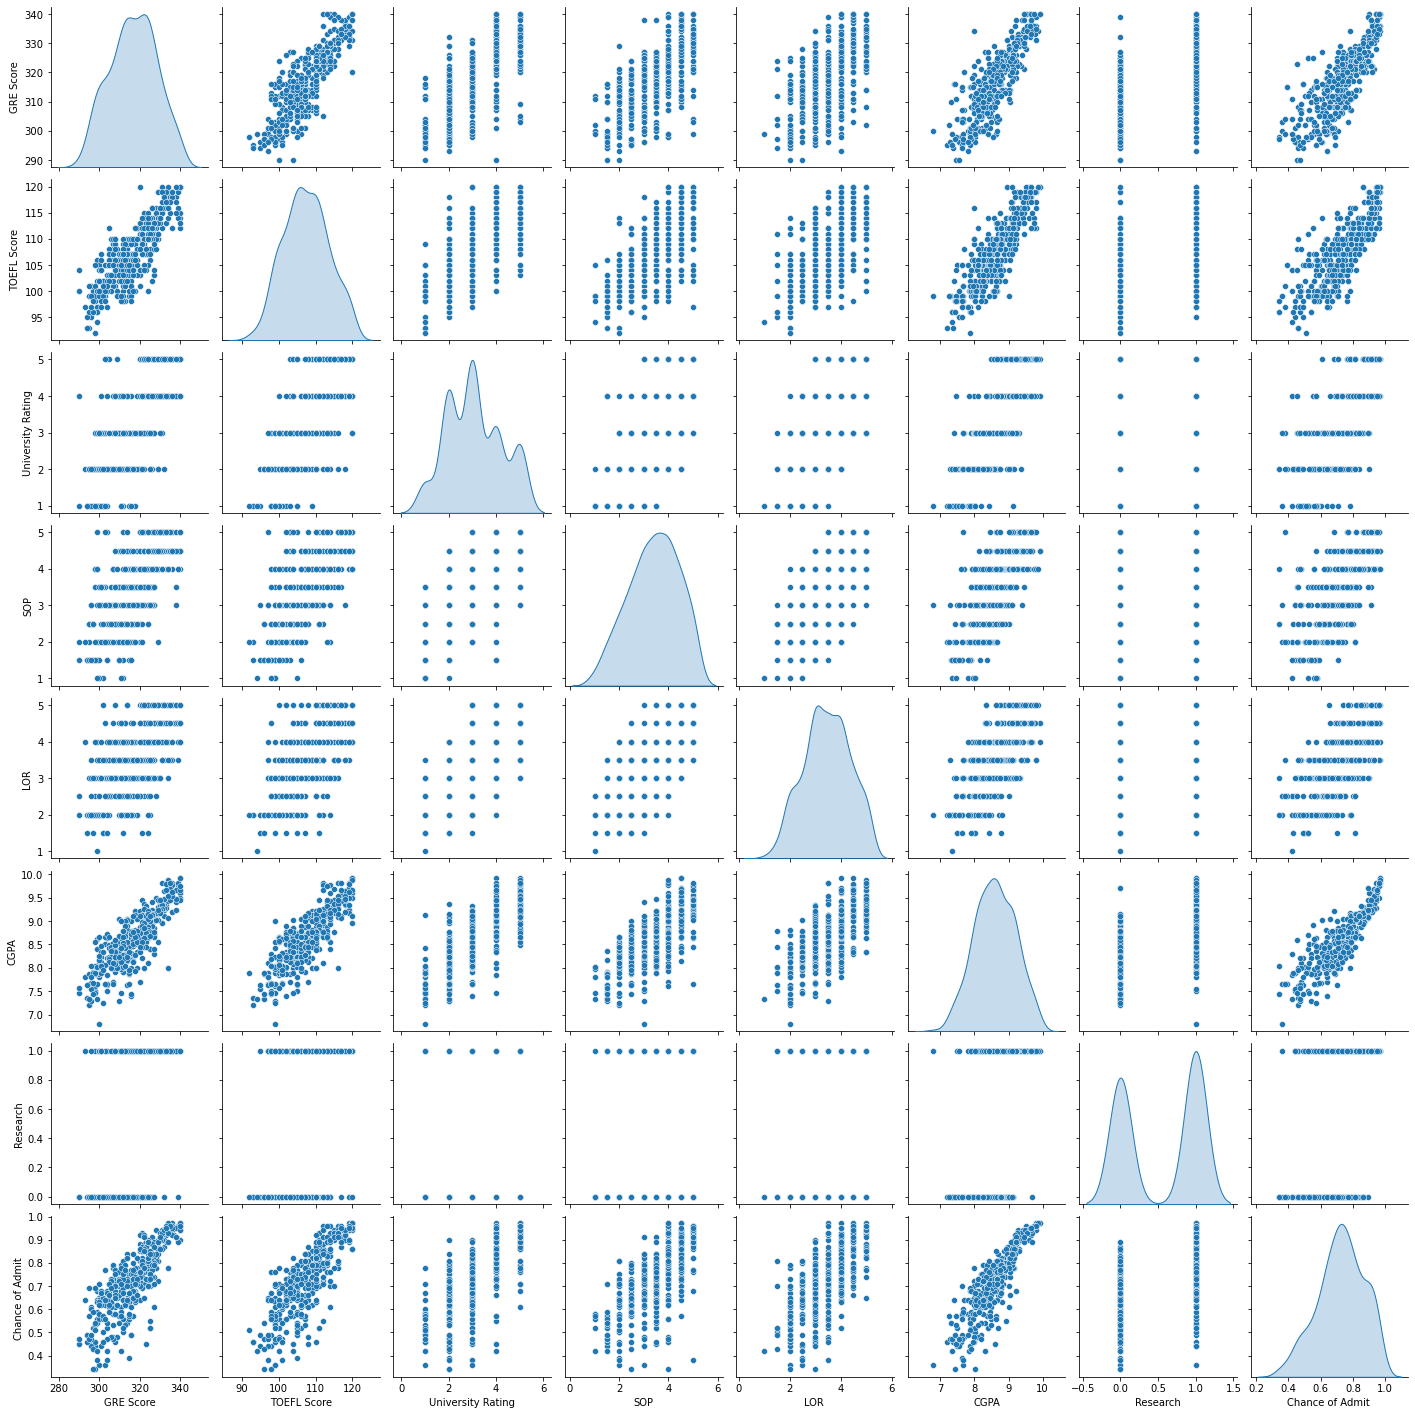

In [167]:
df1
sns.pairplot(df1,diag_kind="kde")

<AxesSubplot:>

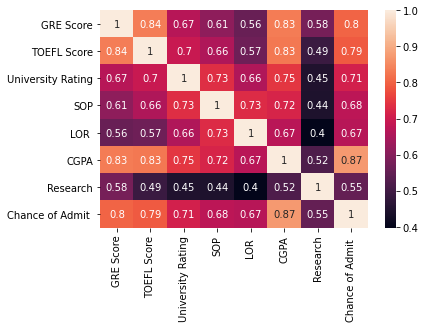

In [168]:
sns.heatmap(df1.corr(), annot=True)

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

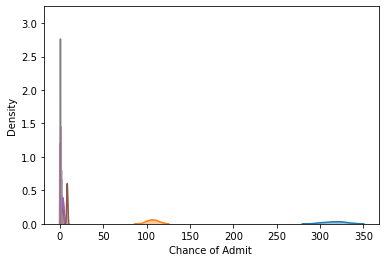

In [146]:
for x in df1.columns:
    sns.distplot(df[x])

C:\Users\Pramod\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chance of Admit', ylabel='Density'>

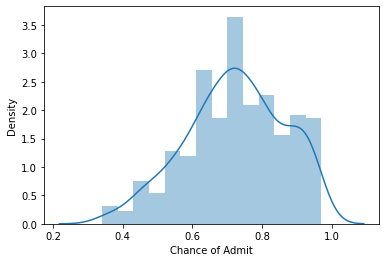

In [90]:
sns.distplot(df1["Chance of Admit"])

In [147]:
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [171]:
x=df1.drop(['Chance of Admit '], axis=1)

In [172]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [173]:
y=df1[['Chance of Admit ']]

In [174]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [175]:
print(x.shape)
print(y.shape)
x.head()

(400, 7)
(400, 1)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [177]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
145,320,113,2,2.0,2.5,8.64,1
387,307,105,2,2.0,3.5,8.10,0
44,326,113,5,4.5,4.0,9.40,1
138,326,116,2,4.5,3.0,9.08,1
43,332,117,4,4.5,4.0,9.10,0
...,...,...,...,...,...,...,...
132,309,105,5,3.5,3.5,8.56,0
289,313,109,3,4.0,3.5,9.00,0
109,304,103,5,5.0,4.0,8.64,0
395,324,110,3,3.5,3.5,9.04,1


In [178]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
146,315,105,3,2.0,2.5,8.48,0
332,308,106,3,3.5,2.5,8.21,1
67,316,107,2,3.5,3.5,8.64,1
362,338,115,5,4.5,5.0,9.23,1
102,314,106,2,4.0,3.5,8.25,0
...,...,...,...,...,...,...,...
55,320,103,3,3.0,3.0,7.70,0
65,325,112,4,3.5,3.5,8.92,0
16,317,107,3,4.0,3.0,8.70,0
153,324,105,3,3.0,4.0,8.75,0


In [179]:
y_train

,Chance of Admit
145,0.81
387,0.53
44,0.91
138,0.80
43,0.87
...,...
132,0.71
289,0.79
109,0.68
395,0.82


In [180]:
 y_test

,Chance of Admit
146,0.75
332,0.75
67,0.57
362,0.91
102,0.62
...,...
55,0.64
65,0.55
16,0.66
153,0.79


In [181]:
from sklearn.linear_model import LinearRegression
#Linear Regression

In [182]:
Linear=LinearRegression()

In [183]:
Linear.fit(x_train,y_train)

LinearRegression()

In [184]:
Linear.coef_

array([[ 0.00215065,  0.00248381,  0.00335465, -0.00151797,  0.02515935,
         0.12438528,  0.01650522]])

In [185]:
Linear.intercept_

array([-1.39480014])

In [186]:
d1=Linear.coef_.reshape(7,1)

In [187]:
Co_Analysis=pd.DataFrame(data=d1, index=x_train.columns, columns=["coefficnet of x"])

In [188]:
Co_Analysis

,coefficnet of x
GRE Score,0.002151
TOEFL Score,0.002484
University Rating,0.003355
SOP,-0.001518
LOR,0.025159
CGPA,0.124385
Research,0.016505


In [200]:
y_test

,Chance of Admit
146,0.75
332,0.75
67,0.57
362,0.91
102,0.62
...,...
55,0.64
65,0.55
16,0.66
153,0.79


In [201]:
y_pred =Linear.predict(x_test)

In [202]:
y_pred

array([[0.66816926],
       [0.63624273],
       [0.73122214],
       [0.91807932],
       [0.65866257],
       [0.77019932],
       [0.67465277],
       [0.85075008],
       [0.8370863 ],
       [0.80042174],
       [0.48056318],
       [0.66584472],
       [0.68620325],
       [0.61657599],
       [0.53355645],
       [0.57336479],
       [0.49646167],
       [0.82307466],
       [0.62536007],
       [0.69933237],
       [0.9672319 ],
       [0.85839996],
       [0.86003093],
       [0.90411493],
       [0.62206212],
       [0.69831889],
       [0.64005358],
       [0.89966116],
       [0.80355934],
       [0.75630733],
       [0.90994904],
       [0.84070293],
       [0.59694903],
       [0.72751722],
       [0.71782846],
       [0.60565153],
       [0.59822195],
       [0.7088992 ],
       [0.7832538 ],
       [0.69810586],
       [0.93723918],
       [0.6595092 ],
       [0.9532787 ],
       [0.69738735],
       [0.68455438],
       [0.64827778],
       [0.65447539],
       [0.880

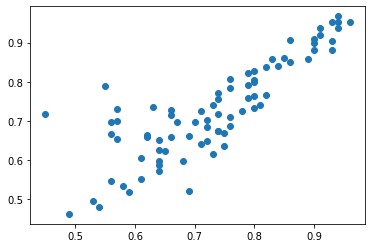

In [191]:
plt.scatter(y_test,y_pred)

In [192]:
from sklearn import metrics

In [198]:
from sklearn.metrics import mean_absolute_error,r2_score
print("R2 score of the model is ",r2_score(y_pred,y_test))
print("mean_absolute_error  of the model is ",mean_absolute_error(y_pred,y_test))
 


R2 score of the model is  0.6816863553976765
mean_absolute_error  of the model is  0.04913671196926681


In [203]:
df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [204]:
Linear([[0,337,118,4,4.5,4.5,9.65,1]])

TypeError: 'LinearRegression' object is not callable

In [205]:
import gradio as gr

In [216]:
def predict_ChanceofAdmit(x1,x2,x3,x4,x5,x6,x7):
    x = np.array([x1,x2,x3,x4,x5,x6,x7])
    pred_score =Linear.predict([x])
    return np.round(pred_score[0], 2)

In [ ]:
input1 = gr.inputs.Number(label='GRE Score')
input2 = gr.inputs.Number(label='TOEFL Score')
input3 = gr.inputs.Number(label='University Rating')
input4 = gr.inputs.Number(label='SOP')
input5 = gr.inputs.Number(label='LOR')
input6 = gr.inputs.Number(label='CGPA')
input7 = gr.inputs.Number(label='Research')
 
output = gr.outputs.Textbox(label='Chance of Admit')


gr.Interface( fn=predict_ChanceofAdmit,
              inputs=[input1, input2,input3,input4,input5,input6,input7],
             outputs=output).launch(debug=True,share=True);

Running locally at: http://127.0.0.1:7862/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://56839.gradio.app
Interface loading below...


Socket exception: An existing connection was forcibly closed by the remote host (10054)
